## Imports

In [1]:
import os

import matplotlib.pyplot as plt

from analysis import load_experiment_results, process_exp_results_to_df

## Load experimental data

In [20]:
exp_results = []
for exp in sorted([f for f in os.listdir("sacred") if not f.startswith("_")]):
    path = os.path.join("sacred", exp)
    exp_results.append(load_experiment_results(path))

exp_df = process_exp_results_to_df(exp_results)
exp_df = exp_df[ exp_df["data"] == "input_data_M2.txt" ]
exp_df.sort_values("min")

,average,data,max_epochs,method,min,num_repeats,pop_size,random_born,repeat,status,survive
2,7.528720e+04,input_data_M2.txt,50.0,sol_genetic,7851,NaN,100.0,0.2,10,COMPLETED,0.2
1,3.998250e+05,input_data_M2.txt,50.0,sol_genetic,45305,NaN,10.0,0.2,10,COMPLETED,0.2
7,1.312031e+06,input_data_M2.txt,NaN,sol_repeat_random_half,146829,10000.0,NaN,NaN,10,COMPLETED,NaN
9,9.612385e+06,input_data_M2.txt,NaN,sol_repeat_random,496687,10000.0,NaN,NaN,10,COMPLETED,NaN
8,3.466168e+07,input_data_M2.txt,NaN,sol_repeat_random,1313361,1000.0,NaN,NaN,10,COMPLETED,NaN
6,2.461542e+07,input_data_M2.txt,NaN,sol_repeat_random_half,2873575,1000.0,NaN,NaN,10,COMPLETED,NaN
5,2.338566e+08,input_data_M2.txt,NaN,sol_repeat_random_half,10625393,100.0,NaN,NaN,10,COMPLETED,NaN
4,6.597086e+09,input_data_M2.txt,NaN,sol_repeat_random_half,1341245025,10.0,NaN,NaN,10,COMPLETED,NaN
0,2.230520e+10,input_data_M2.txt,NaN,sol_random,1669190357,NaN,NaN,NaN,10,COMPLETED,NaN
10,1.875186e+09,input_data_M2.txt,NaN,sol_sort_greedy,1875185989,NaN,NaN,NaN,10,COMPLETED,NaN


## Create plots

Text(0.5, 1.0, 'Average result by method')

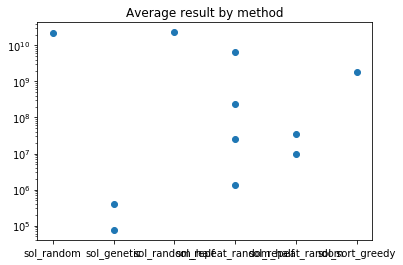

In [21]:
plt.scatter(exp_df["method"], exp_df["average"])
plt.yscale("log")
plt.title("Average result by method")

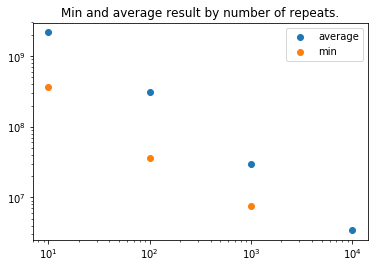

In [17]:
selected = exp_df[ exp_df["method"] == "sol_repeat_random_half" ]

plt.scatter(selected["num_repeats"], selected["average"], label="average")
plt.scatter(selected["num_repeats"], selected["min"], label="min")

plt.title("Min and average result by number of repeats.")
plt.xscale("log")
plt.yscale("log")
plt.legend()